### Import python files

In [12]:
from code.timeseries import MackeyGlass
from code.spikecoding import step_forward, rate_encoding, combine_dataset
from code.LSM import LSM
from code.visualizer import show_dataset, show_states, show_learning

### Create a Mackey-Glass time series

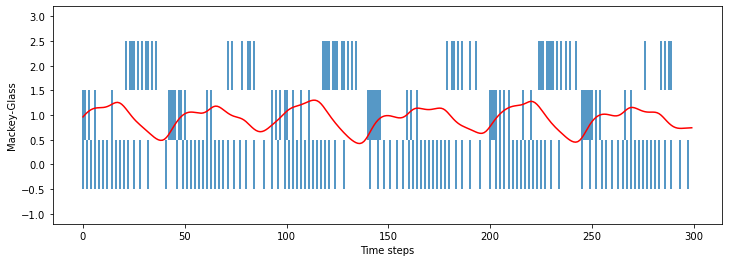

In [13]:
L = 5000
x, y = MackeyGlass().get_prediction_set(length=L, k=20)
x_spikes = combine_dataset(rate_encoding(x), step_forward(x))
show_dataset(L-300, L, x, x_spikes)

### Create a Liquid State Machine

In [14]:
lsm = LSM(liquid_size=700, nbr_inputs=x_spikes.shape[0])

### Run Experiment

In [15]:
results = []
BITS = [2, 3, 6, 16]
for b in BITS:
    print(f"Run liquid using {b} bits..")
    lsm.set_bits(b)
    results.append(lsm.train_readout(x_spikes, y))

Run liquid using 2 bits..
Run liquid using 3 bits..
Run liquid using 6 bits..
Run liquid using 16 bits..


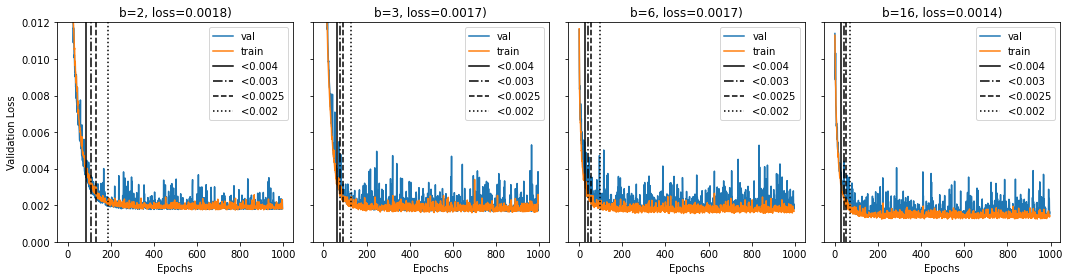

In [16]:
show_learning(nbr_parameters=len(BITS),
              parameter_labels=[f'b={b}' for b in BITS],
              val_loss=[r[5] for r in results],
              train_loss=[r[4] for r in results],
              x_markers=[0.004, 0.003, 0.0025, 0.002],
              min_y=0, max_y=0.012)

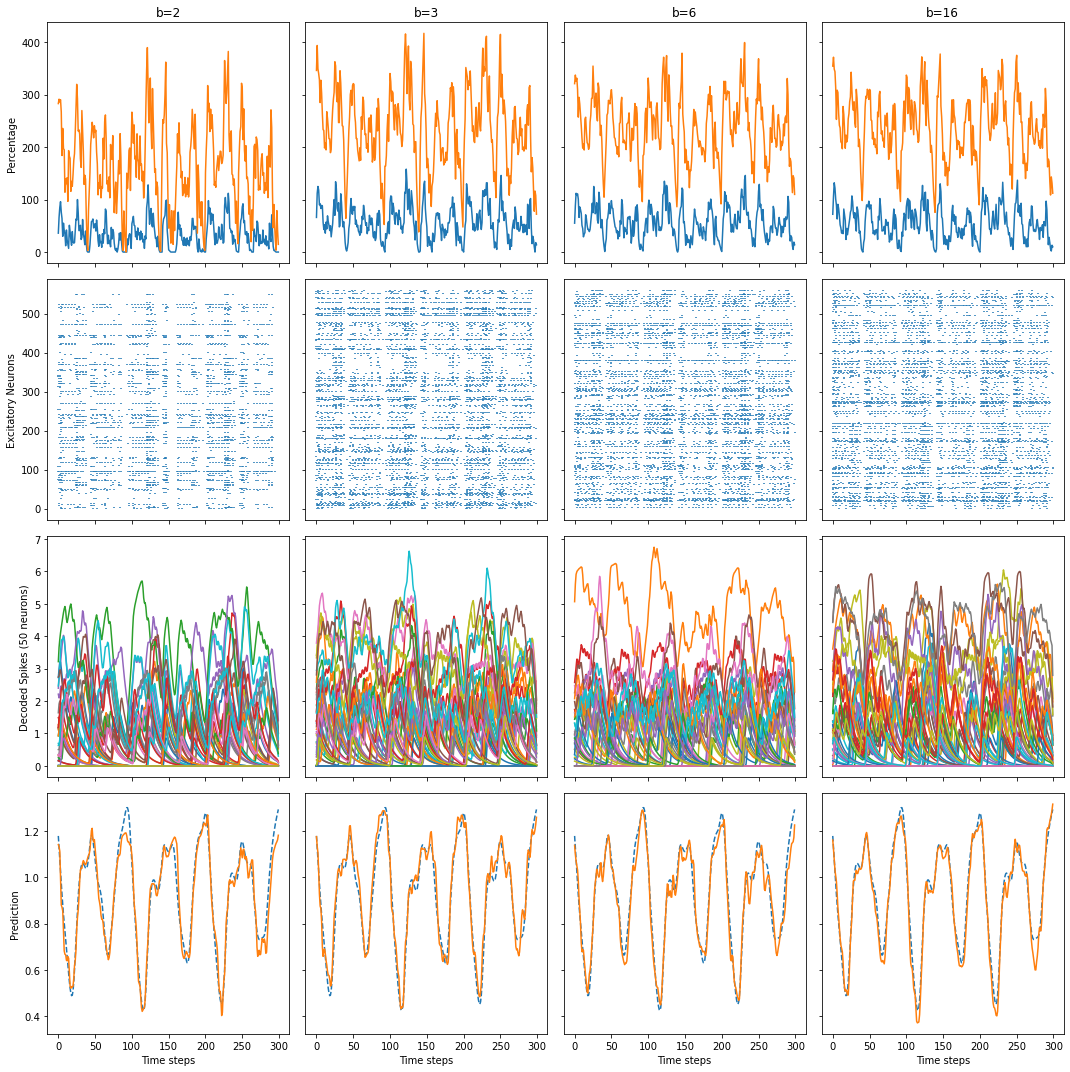

In [17]:
show_states(start=L - 300, end=L,
            nbr_parameters=len(BITS),
            parameter_labels=[f'b={b}' for b in BITS],
            activity=[r[0] for r in results],
            energy=[r[1] for r in results],
            output_spikes=[r[2] for r in results],
            output_decoded=[r[3] for r in results],
            actual=y,
            prediction=[r[6] for r in results])